In [3]:
import pandas as pd

In [4]:
x_train = pd.read_csv("data/x_train_final_asAbTs5.csv", index_col=0)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6076546 entries, 0 to 6076545
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   total_count       int64  
 1   longitude_scaled  float64
 2   latitude_scaled   float64
 3   Precipitations    float64
 4   HauteurNeige      float64
 5   Temperature       float64
 6   ForceVent         float64
 7   day_of_week       int64  
 8   month_of_year     int64  
 9   hour              int64  
dtypes: float64(6), int64(4)
memory usage: 510.0 MB


In [5]:
y_train = pd.read_csv("data/y_train_final_YYyFil7.csv", index_col=0)
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6076546 entries, 0 to 6076545
Data columns (total 1 columns):
 #   Column         Dtype  
---  ------         -----  
 0   invalid_ratio  float64
dtypes: float64(1)
memory usage: 92.7 MB


## Profile visualisation

In [6]:
data_train = pd.concat([x_train, y_train], axis=1)
data_train.rename(columns={"invalid_ratio": "y"}, inplace=True)
data_train.head()


,total_count,longitude_scaled,latitude_scaled,Precipitations,HauteurNeige,Temperature,ForceVent,day_of_week,month_of_year,hour,y
0,1,0.998417,0.996118,0.0,0.0,14.6,2.5,3,4,8,0.000000
1,35,0.999222,0.996000,0.0,0.0,22.4,3.1,5,3,13,0.228571
2,3,0.998371,0.996309,1.8,0.0,11.7,3.3,4,10,8,1.000000
3,1,0.998804,0.996343,0.0,0.0,28.6,2.6,4,2,16,0.000000
4,2,0.999126,0.996417,0.0,0.0,9.6,3.2,3,9,18,0.500000


In [ ]:
if false:
from ydata_profiling import ProfileReport
    profile = ProfileReport(data_train, title="Profil de données")
    profile.to_file("profiles/data_train_profile.html")

## localisation study

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

geodata = data_train.copy()

# geodata = geodata.sample(n=1000000, random_state=42) # pour raccourcir le temps de calcul

# on reconcentre sur paris
def geo_filter(data, latitude_bounds=(0.995, 0.998), longitude_bounds=(0.998, 1.001)):
    data_out = data[data["longitude_scaled"] > longitude_bounds[0]]
    data_out = data_out[data_out["longitude_scaled"] < longitude_bounds[1]]
    data_out = data_out[(data_out["latitude_scaled"] >= latitude_bounds[0]) & (data_out["latitude_scaled"] <= latitude_bounds[1])]
    return data_out

geodata = geo_filter(geodata) #on filtre sur paris

# On groupe par longitude et latitude, on récupère à la fois le nombre de points (count)
# et la moyenne des autres variables numériques
# geodata_mean_by_location = geodata.groupby(["longitude_scaled", "latitude_scaled"]).mean().reset_index()
# geodata_mean_by_location.head()

# geodata_size = geodata.groupby(["longitude_scaled", "latitude_scaled"]).size().reset_index(name="count")

# geodata_mean_by_location["size"] = geodata_size["count"]

geodata_mean_by_location = geodata.groupby(
    ["longitude_scaled", "latitude_scaled"]
).mean().reset_index()

geodata_size = geodata.groupby(
    ["longitude_scaled", "latitude_scaled"]
).size().reset_index(name="size")

geodata_joined = geodata_mean_by_location.merge(
    geodata_size,
    on=["longitude_scaled", "latitude_scaled"],
    how="left"
)
geodata_joined.sort_values(by="y", ascending=True, inplace=True)
geodata_joined.info()

# m = geodata["count"].max()
# geodata["size"] = geodata["count"].apply(lambda x: x/m)
# geodata.sort_values(by="count", ascending=True, inplace=True)
# geodata.head()

# geodata[geodata["count"] > 100]["count"].hist(bins=5)



<class 'pandas.core.frame.DataFrame'>
Index: 2487119 entries, 1714071 to 2487105
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   longitude_scaled  float64
 1   latitude_scaled   float64
 2   total_count       float64
 3   Precipitations    float64
 4   HauteurNeige      float64
 5   Temperature       float64
 6   ForceVent         float64
 7   day_of_week       float64
 8   month_of_year     float64
 9   hour              float64
 10  y                 float64
 11  size              int64  
dtypes: float64(11), int64(1)
memory usage: 246.7 MB


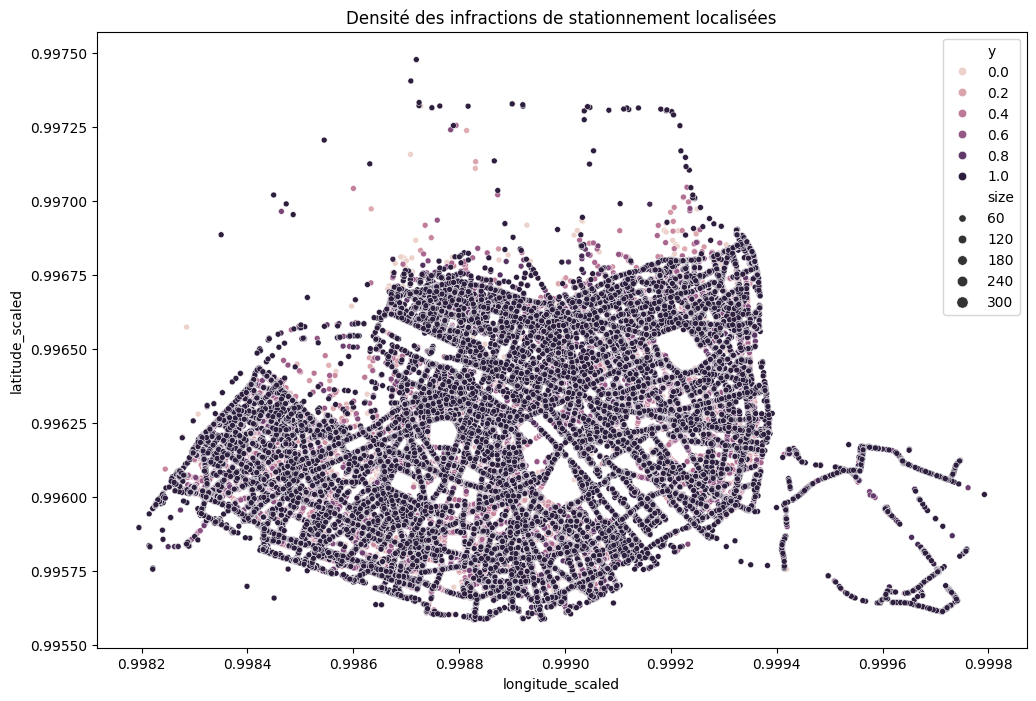

In [16]:
geodata_sample = geodata_joined.sample(n=200000, random_state=42).sort_values(by="y", ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="longitude_scaled", y="latitude_scaled", hue="y", size = "size", data=geodata_sample, legend="brief")
plt.title("Densité des infractions de stationnement localisées")
plt.show()

population totale: 1239636


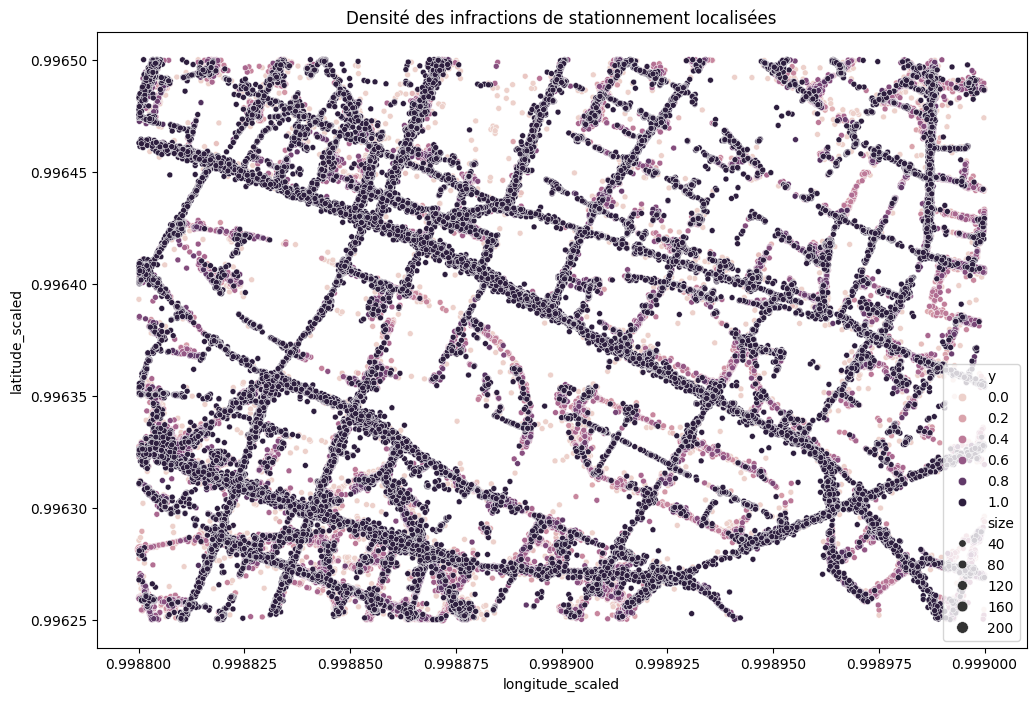

In [22]:
# zoom

geodata_sample = geo_filter(geodata_joined,latitude_bounds=(0.99625, 0.99650), longitude_bounds=(0.9988, 0.9990))
print("population totale:", geodata_sample.size)
geodata_sample = geodata_sample.sample(n=100000, random_state=42).sort_values(by="y", ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="longitude_scaled", y="latitude_scaled", hue="y", size = "size", data=geodata_sample, legend="brief")
plt.title("Densité des infractions de stationnement localisées")
plt.show()


population totale: 18970


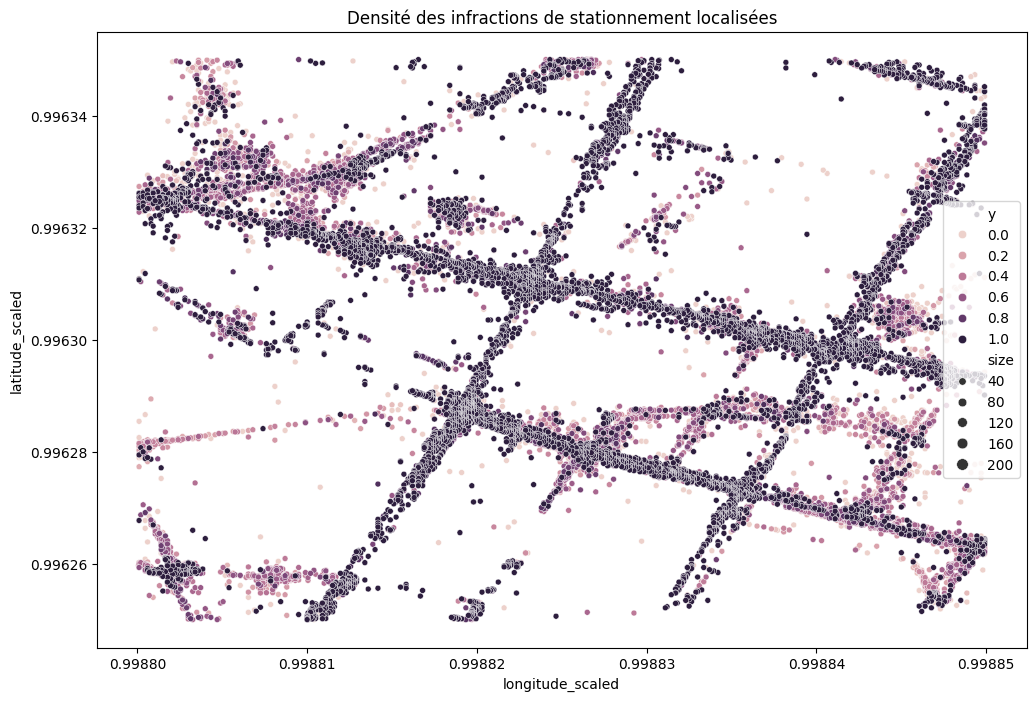

In [28]:
## zoom ++ 

geodata_sample = geo_filter(geodata_joined,latitude_bounds=(0.99625, 0.99635), longitude_bounds=(0.9988, 0.998850))
print("population totale:", geodata_sample.shape[0])
geodata_sample = geodata_sample.sort_values(by="y", ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="longitude_scaled", y="latitude_scaled", hue="y", size = "size", data=geodata_sample, legend="brief")
plt.title("Densité des infractions de stationnement localisées")
plt.show()

In [27]:
# profil sur zoom ++

profile = ProfileReport(geodata_sample, title="Profil de données sur un zoom géographique")
profile.to_file("geodata_zoom_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 86.92it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]